# 套件

In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 89
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 參數(建議學員可以根據需求自行調整看看)

In [2]:
from datetime import datetime
y_symbol = "^TWII" # 股票代碼 ^TWII 台灣加權指數 美股蘋果 AAPL 台股台積電 2330.TW
startdate = datetime(2015,1,1) # 訓練起始日期
enddate = datetime(2025,4,15) # 訓練結束日期
漲幅  = 1.03 # 漲3%出場
跌幅 = 0.97 # 跌3%出場
持有時間 = 20 #預期要持有多長時間

# 載入資料

https://sharegpt.com/c/nwqFGKt

In [3]:
import yfinance as yf
from datetime import datetime, timedelta

df = yf.download(y_symbol, start = startdate,end = enddate)

display(df)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII
Date,,,,,
2015-01-05,9274.068359,9292.267496,9181.977956,9292.267496,2311000
2015-01-06,9048.298828,9209.887939,9043.399436,9209.887939,2725800
2015-01-07,9080.047852,9108.618032,9050.498184,9051.898568,2384100
2015-01-08,9237.988281,9246.578086,9153.988663,9153.988663,2657600
2015-01-09,9215.538086,9284.528006,9215.538086,9247.358253,2398800
...,...,...,...,...,...
2025-04-08,18459.949219,19064.470703,18180.480469,19064.470703,5839900
2025-04-09,17391.759766,18371.519531,17306.970703,18337.439453,6177900


# Label triple_barrier

https://sharegpt.com/c/Eir89kz

提示詞:
我想請你幫忙做程式碼補全 
#字元後面的描述代表我想做的事情 
<you codeing here>代表請你輸入代碼,
我會貼給你半完成的程式碼 
請你幫我補全程式碼,
我的第一個程式碼如下: 
def triple_barrier_signal(price,ub,lb,t): 
''' triple-barrier包含2個horizontal barrier，1個vertical barrier。 
首先解釋一下這3个barrier： 根據3個barrier中第一個被touch的進行label barrier 1 
(the upper barrier)首先達到，label 1 barrier 2（the lower barrier)首先達到，
label -1 如果barrier 1和barrier 2都没有達到，
则barrier 3達到，label 0 ''' 
signal = [] for i in range(len(price)-t): 
# 情況1.如果price[i:i+t+1]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1 
<you codeing here> 
# 情況2.如果price[i:i+t+1]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1 
<you codeing here> 
# 如果以上情況1和情況2都沒有發生則signal[i] = 0 
<you codeing here> 
return signal



In [5]:
import numpy as np
import math
def triple_barrier_signal(price,ub,lb,t):
  '''
  triple-barrier包含2個horizontal barrier，1個vertical barrier。
  首先解釋一下這3个barrier：
  根據3个barrier中第一個被touch的進行label
  barrier 1 (the upper barrier)首先達到，label 1
  barrier 2（the lower barrier)首先達到，label -1
  如果barrier 1和barrier 2都没有達到，则barrier 3達到，label 0
  '''
  signal = []
  for i in range(len(price)-t):
    # 情況1.如果price[i:i+t+1]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1
    if max(price[i:i+t+1]) > price[i] * ub:
      signal.append(1)
    # 情況2.如果price[i:i+t+1]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1
    elif min(price[i:i+t+1]) < price[i] * lb:
      signal.append(-1)
    # 如果以上情況1和情況2都沒有發生則signal[i] = 0
    else:
      signal.append(0)
  return signal

from itertools import chain
ret = triple_barrier_signal(list(chain.from_iterable(df.Close.values.tolist())),漲幅,跌幅,持有時間)
df = df.head(len(ret))
df['triple_barrier_signal'] = ret

# check 'triple_barrier_signal'

In [6]:
df.tail(20)

Price,Close,High,Low,Open,Volume,triple_barrier_signal
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,
Date,,,,,,
2025-01-07,23651.269531,23943.949219,23651.269531,23824.720703,3207900,-1
2025-01-08,23407.330078,23671.279297,23388.630859,23522.289062,2606700,-1
2025-01-09,23081.130859,23463.960938,23081.130859,23406.720703,3399500,0
2025-01-10,23011.859375,23202.250000,22989.669922,23067.460938,2979400,0
2025-01-13,22488.330078,23070.320312,22458.220703,23070.320312,3544500,1
2025-01-14,22797.519531,22797.519531,22542.929688,22573.960938,2319000,1
2025-01-15,22514.570312,22777.339844,22509.650391,22757.460938,2359800,1
2025-01-16,23025.099609,23147.689453,22817.519531,22817.519531,2497000,1


In [7]:
import seaborn as sns
print(df['triple_barrier_signal'].value_counts())
#sns.countplot(df['triple_barrier_signal'])

triple_barrier_signal
 1    1079
-1     752
 0     622
Name: count, dtype: int64


# plot buy price and sell price

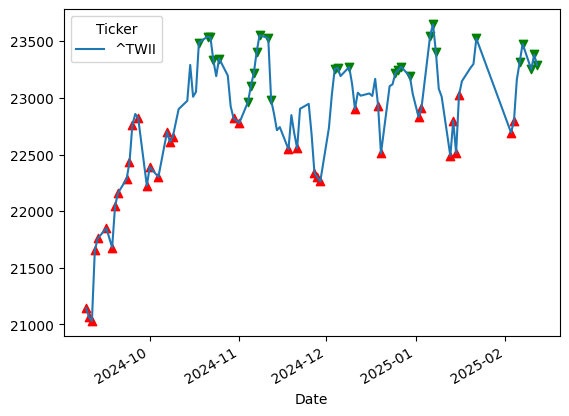

In [8]:
import matplotlib.pyplot as plt

df_recent = df.tail(100)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()
plt.scatter(buy.index,buy.values,color='red',marker='^')
plt.scatter(sell.index,sell.values,color='green',marker='v')
plt.show()

# 建立ohlcv

In [9]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

https://sharegpt.com/c/lXPO7as

count    2452.000000
mean       54.065397
std        12.582423
min         0.000000
25%        45.751166
50%        55.015825
75%        62.909796
max        84.230153
Name: RSI, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\80940770.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RSI'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,
Date,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945


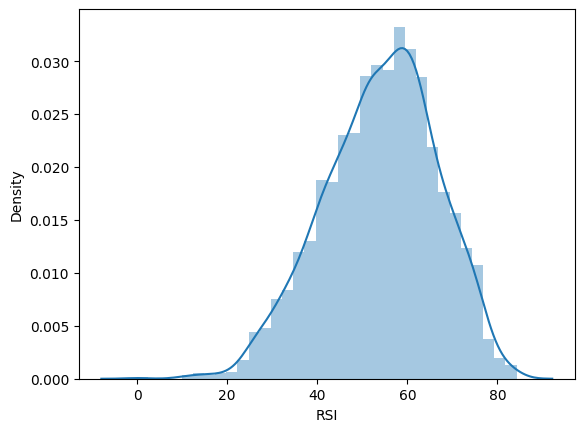

In [10]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    2440.000000
mean      -39.718935
std        31.422425
min      -100.000000
25%       -67.208638
50%       -32.352929
75%       -11.494845
max        -0.000000
Name: Williams %R, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\4271450618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Williams %R'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,
Date,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378


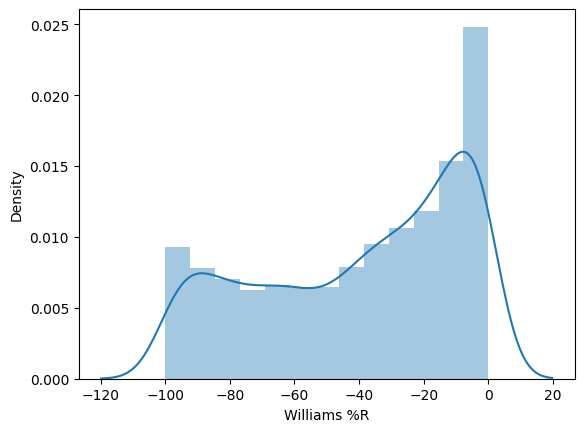

In [11]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     2413.000000
mean     13212.873647
std       4081.461048
min       8044.833020
25%       9931.433641
50%      11159.941716
75%      16648.447218
max      23104.902058
Name: SMA, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\1878676325.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SMA'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,
Date,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058


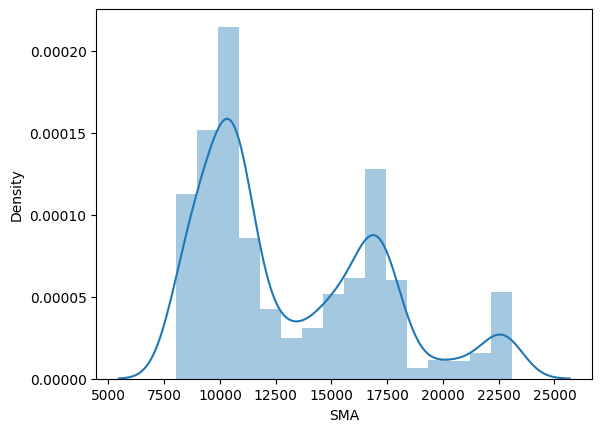

In [12]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count     2453.000000
mean     13239.101196
std       4156.070757
min       7786.421896
25%       9842.623847
50%      11194.577139
75%      16602.548282
max      23822.811210
Name: EMA, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\3115164127.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EMA'])


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,
Date,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608


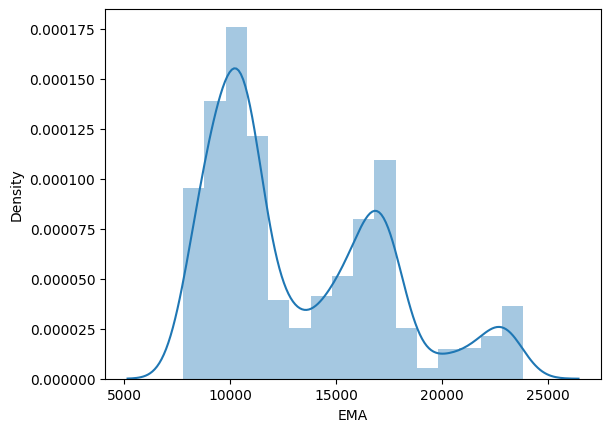

In [13]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     2445.000000
mean     13259.969271
std       4164.276256
min       7753.099240
25%       9868.460243
50%      11286.706359
75%      16601.440972
max      23970.548655
Name: WMA, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\1037319935.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WMA'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,
Date,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689


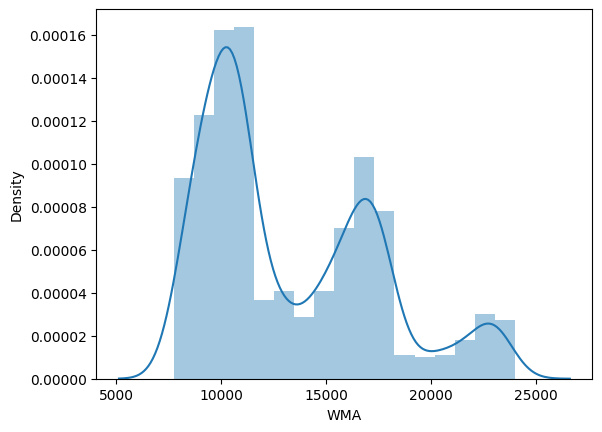

In [14]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     2435.000000
mean     13287.773330
std       4178.867277
min       7586.372645
25%       9909.216920
50%      11348.941353
75%      16632.100246
max      24251.328573
Name: HMA, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\1554131951.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HMA'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,
Date,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740


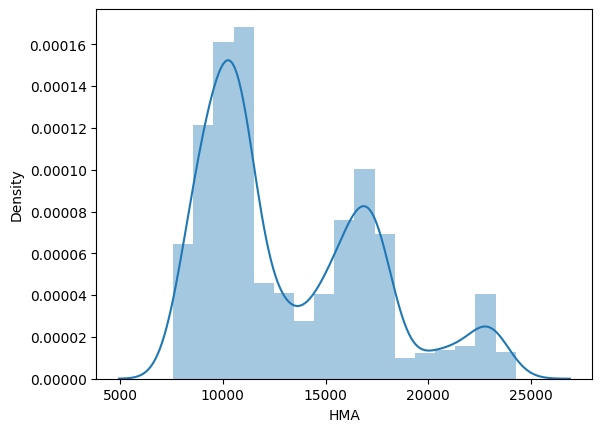

In [15]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     2453.000000
mean     13261.960120
std       4179.377040
min       7579.969193
25%       9874.250703
50%      11257.316248
75%      16618.177871
max      24254.656706
Name: TEMA, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\348095914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TEMA'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,
Date,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242


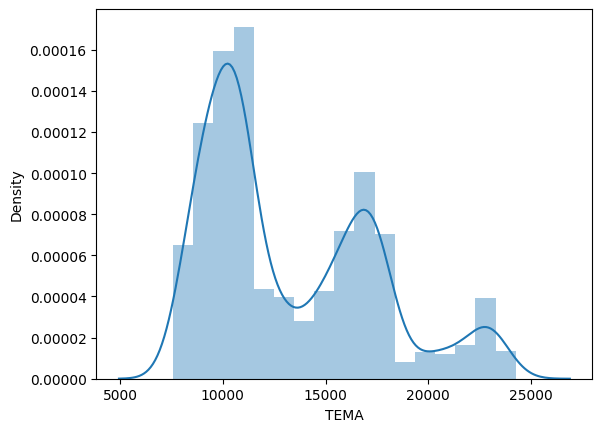

In [16]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    2452.000000
mean       23.577938
std       111.229745
min      -342.035040
25%       -58.523240
50%        46.460472
75%       103.800166
max       347.439744
Name: CCI, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\4109371288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CCI'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,
Date,,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396,53.246592
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409,73.604971
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002,39.786289
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946,58.942760
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242,55.557043


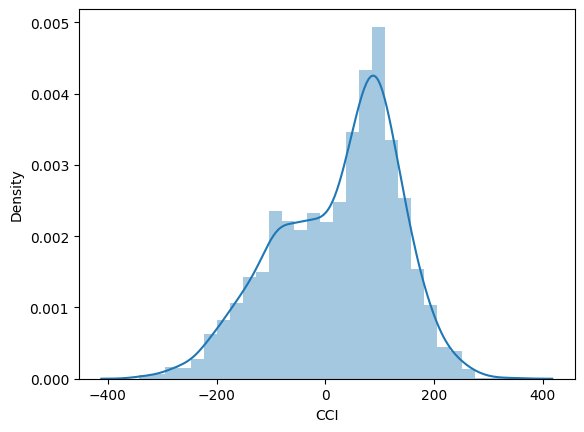

In [17]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    2452.000000
mean        8.675639
std        29.536891
min      -100.000000
25%       -11.286517
50%        11.056466
75%        30.127898
max        76.380951
Name: CMO, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\2048488867.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CMO'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,
Date,,,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396,53.246592,10.140697
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409,73.604971,15.939536
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002,39.786289,5.371694
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946,58.942760,10.650395
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242,55.557043,5.955519


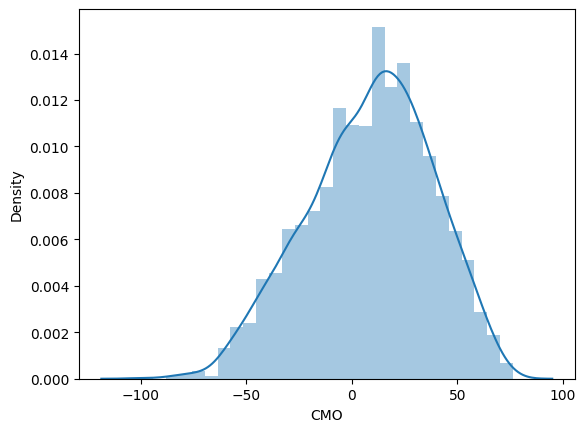

In [18]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    2453.000000
mean        0.071472
std        50.512813
min      -346.978047
25%       -22.770881
50%         0.502384
75%        26.593622
max       214.802204
Name: MACD, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\2662787808.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MACD'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396,53.246592,10.140697,11.038551
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409,73.604971,15.939536,32.052133
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002,39.786289,5.371694,28.917404
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946,58.942760,10.650395,33.594617
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242,55.557043,5.955519,28.410194


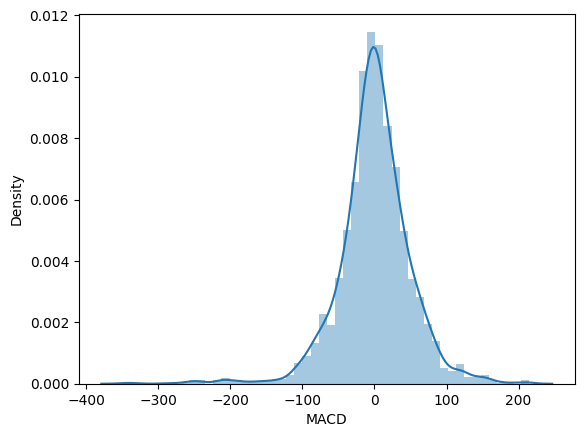

In [19]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    2453.000000
mean        0.000307
std         0.359900
min        -2.355901
25%        -0.200620
50%         0.000051
75%         0.210485
max         1.592874
Name: PPO, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\3095035729.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PPO'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396,53.246592,10.140697,11.038551,0.047926
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409,73.604971,15.939536,32.052133,0.138764
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002,39.786289,5.371694,28.917404,0.125094
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946,58.942760,10.650395,33.594617,0.145127
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242,55.557043,5.955519,28.410194,0.122607


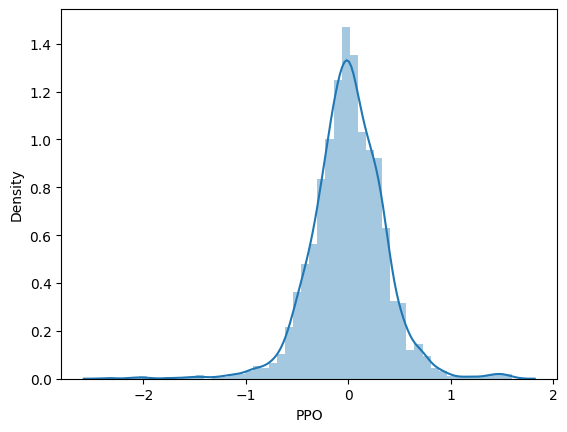

In [20]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    2441.000000
mean        0.524185
std         3.635468
min       -23.361982
25%        -1.427090
50%         0.829138
75%         2.822654
max        16.773101
Name: ROC, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\1860037326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ROC'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396,53.246592,10.140697,11.038551,0.047926,1.324275
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409,73.604971,15.939536,32.052133,0.138764,4.402014
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002,39.786289,5.371694,28.917404,0.125094,1.994169
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946,58.942760,10.650395,33.594617,0.145127,3.861857
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242,55.557043,5.955519,28.410194,0.122607,1.149400


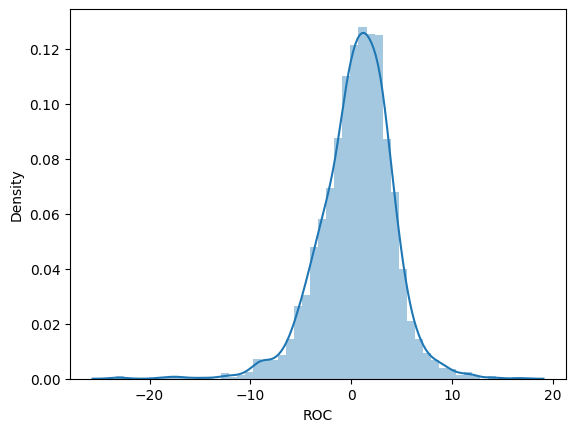

In [21]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    2.444000e+03
mean     4.430967e+09
std      7.345526e+09
min     -8.254754e+09
25%     -2.667106e+08
50%      1.643904e+09
75%      7.114890e+09
max      3.176329e+10
Name: CFI, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\3380674280.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CFI'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396,53.246592,10.140697,11.038551,0.047926,1.324275,1.966742e+10
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409,73.604971,15.939536,32.052133,0.138764,4.402014,1.976945e+10
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002,39.786289,5.371694,28.917404,0.125094,1.994169,1.974167e+10
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946,58.942760,10.650395,33.594617,0.145127,3.861857,1.978985e+10
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242,55.557043,5.955519,28.410194,0.122607,1.149400,1.977510e+10


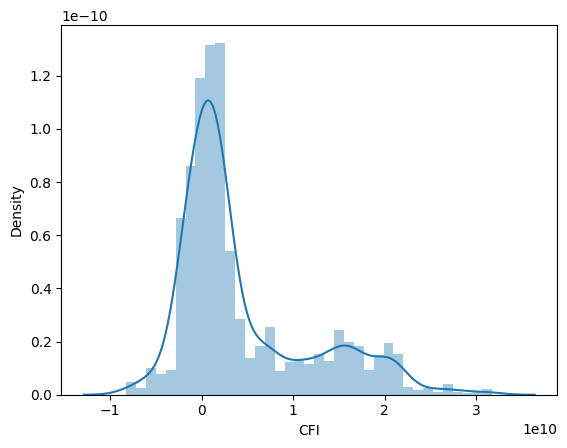

In [22]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    2440.000000
mean        1.208756
std        17.746910
min       -73.465234
25%       -10.172048
50%         1.831596
75%        13.002729
max        76.234934
Name: DMI, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\3167327712.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DMI'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396,53.246592,10.140697,11.038551,0.047926,1.324275,1.966742e+10,-1.353800
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409,73.604971,15.939536,32.052133,0.138764,4.402014,1.976945e+10,1.224460
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002,39.786289,5.371694,28.917404,0.125094,1.994169,1.974167e+10,-0.556163
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946,58.942760,10.650395,33.594617,0.145127,3.861857,1.978985e+10,0.237235
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242,55.557043,5.955519,28.410194,0.122607,1.149400,1.977510e+10,1.102509


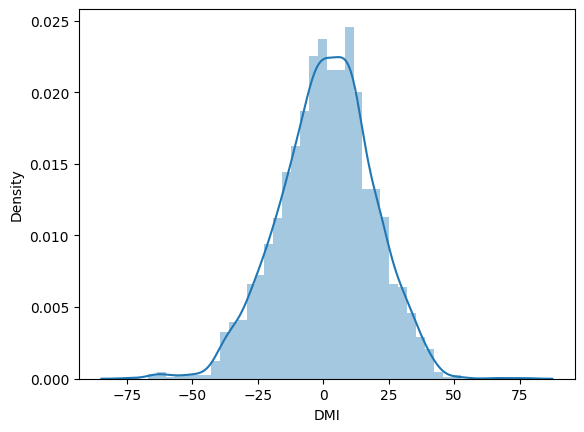

In [23]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

c:\Users\TMP-214\AppData\Local\Programs\Python\Python312\Lib\site-packages\finta\finta.py:828: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sig0, xpt0, af0 = True, high[0], af
c:\Users\TMP-214\AppData\Local\Programs\Python\Python312\Lib\site-packages\finta\finta.py:829: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  _sar = [low[0] - (high - low).std()]
c:\Users\TMP-214\AppData\Local\Programs\Python\Python312\Lib\site-packages\finta\finta.py:834: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

count     2453.000000
mean     13194.681076
std       4152.796492
min       7203.036601
25%       9872.428581
50%      11232.270089
75%      16559.570312
max      24416.669922
Name: SAR, dtype: float64


C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\1481618610.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SAR'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-06,23316.599609,23348.419922,23216.650391,23226.500000,2400700,-1,53.898353,-27.493170,23077.669112,23102.035358,...,23143.949804,23171.962396,53.246592,10.140697,11.038551,0.047926,1.324275,1.966742e+10,-1.353800,23505.623711
2025-02-07,23478.269531,23478.269531,23254.169922,23289.970703,2672200,-1,56.103083,-13.836994,23095.750572,23177.282192,...,23203.947519,23335.700409,73.604971,15.939536,32.052133,0.138764,4.402014,1.976945e+10,1.224460,23478.269531
2025-02-10,23252.140625,23448.160156,23163.849609,23421.769531,2706000,-1,52.333201,-32.937988,23101.230564,23192.253879,...,23252.342308,23326.213002,39.786289,5.371694,28.917404,0.125094,1.994169,1.974167e+10,-0.556163,23478.269531
2025-02-11,23384.050781,23485.509766,23289.759766,23321.919922,2956500,-1,54.263868,-22.636515,23104.370093,23230.613259,...,23298.441392,23379.633946,58.942760,10.650395,33.594617,0.145127,3.861857,1.978985e+10,0.237235,22458.220703
2025-02-12,23289.750000,23528.609375,23289.750000,23449.310547,3159400,-1,52.622945,-30.909378,23104.902058,23242.440608,...,23328.862740,23363.071242,55.557043,5.955519,28.410194,0.122607,1.149400,1.977510e+10,1.102509,22458.220703


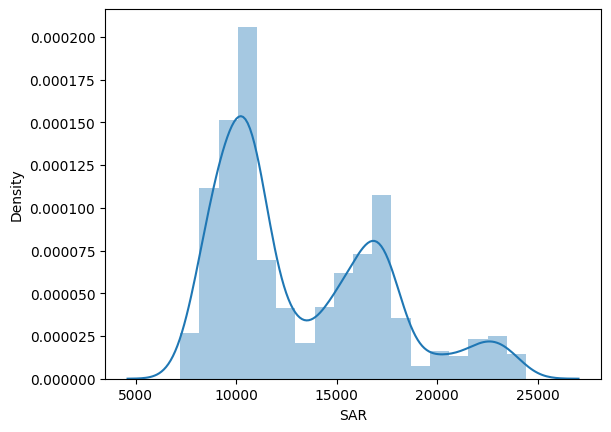

In [24]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# 定義features(X) label(y)

# MACD RSI講一下

In [25]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR']
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2453, 21)
(2413, 16)


Price,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Ticker,,,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2025-02-06,53.898353,-27.493170,23077.669112,23102.035358,23129.263108,23143.949804,23171.962396,53.246592,10.140697,11.038551,0.047926,1.324275,1.966742e+10,-1.353800,23505.623711,-1
2025-02-07,56.103083,-13.836994,23095.750572,23177.282192,23197.533203,23203.947519,23335.700409,73.604971,15.939536,32.052133,0.138764,4.402014,1.976945e+10,1.224460,23478.269531,-1
2025-02-10,52.333201,-32.937988,23101.230564,23192.253879,23210.507075,23252.342308,23326.213002,39.786289,5.371694,28.917404,0.125094,1.994169,1.974167e+10,-0.556163,23478.269531,-1
2025-02-11,54.263868,-22.636515,23104.370093,23230.613259,23247.550521,23298.441392,23379.633946,58.942760,10.650395,33.594617,0.145127,3.861857,1.978985e+10,0.237235,22458.220703,-1
2025-02-12,52.622945,-30.909378,23104.902058,23242.440608,23263.128689,23328.862740,23363.071242,55.557043,5.955519,28.410194,0.122607,1.149400,1.977510e+10,1.102509,22458.220703,-1


# features scaling(特徵縮放)

In [26]:
from sklearn.preprocessing import MinMaxScaler
import pickle
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax.tail()

Price,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Ticker,,,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2025-02-06,0.591668,0.725068,0.998192,0.955054,0.948125,0.933550,0.935070,0.573308,0.593232,0.637289,0.608752,0.615079,0.697740,0.598948,0.947074,-1
2025-02-07,0.621349,0.861630,0.999392,0.959746,0.952334,0.937151,0.944889,0.602836,0.628841,0.674695,0.631757,0.691764,0.700289,0.620362,0.945485,-1
2025-02-10,0.570598,0.670620,0.999756,0.960680,0.953134,0.940055,0.944320,0.553786,0.563946,0.669115,0.628295,0.631770,0.699595,0.605573,0.945485,-1
2025-02-11,0.596589,0.773635,0.999965,0.963072,0.955419,0.942821,0.947524,0.581570,0.596361,0.677440,0.633368,0.678305,0.700799,0.612163,0.886227,-1
2025-02-12,0.574499,0.690906,1.000000,0.963809,0.956379,0.944646,0.946531,0.576659,0.567531,0.668212,0.627665,0.610722,0.700430,0.619349,0.886227,-1


In [27]:
df.tail(3)[['RSI','Williams %R','SMA']]

Price,RSI,Williams %R,SMA
Ticker,,,
Date,,,
2025-02-10,52.333201,-32.937988,23101.230564
2025-02-11,54.263868,-22.636515,23104.370093
2025-02-12,52.622945,-30.909378,23104.902058


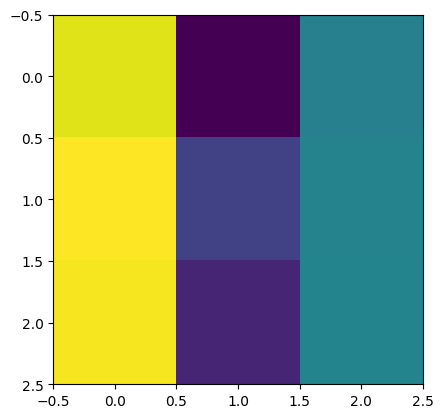

In [28]:
img = df.head(3)[['RSI','Williams %R','MACD']].values
plt.imshow(img)

In [29]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# 定義X,y pair

https://sharegpt.com/c/KcXGMUL

In [30]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:若i為0,則i+days為15因此數據index為0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:若i為0days為15則[i+days-1:i+days]為[14:15]相當於index[14]之y_name('triple_barrier_signal')
  X = np.array(X) # 轉成np_array
  Xs.append(X) #加入至list
  ys.append(y) #加入至list
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

C:\Users\TMP-214\AppData\Local\Temp\ipykernel_45112\1448198490.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features = df.drop(y_name,axis=1).columns.tolist()


100%|██████████| 2399/2399 [00:12<00:00, 186.34it/s]

準備完成


# check 資料總數跟 資料時間範圍

In [31]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2399
第一筆的index開始和結束:2015-03-11-2015-03-31
最後一筆的index開始和結束:2025-01-14-2025-02-12


# Reshape X (圖片數量,長,寬,1張)

In [32]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2399, 15, 15)
(2399, 15, 15, 1)


# One hot encoding of label(獨熱編碼)

原始y代表漲幅

In [33]:
print('One hot encoding前')
print(ys.shape)
print(ys[:5])
from keras.utils import to_categorical

ys = to_categorical(ys, num_classes = 3)
print('One hot encoding後')
print(ys.shape)
print(ys[:5])

One hot encoding前
(2399, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]
One hot encoding後
(2399, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# Visualization

https://sharegpt.com/c/lQ0OLk6

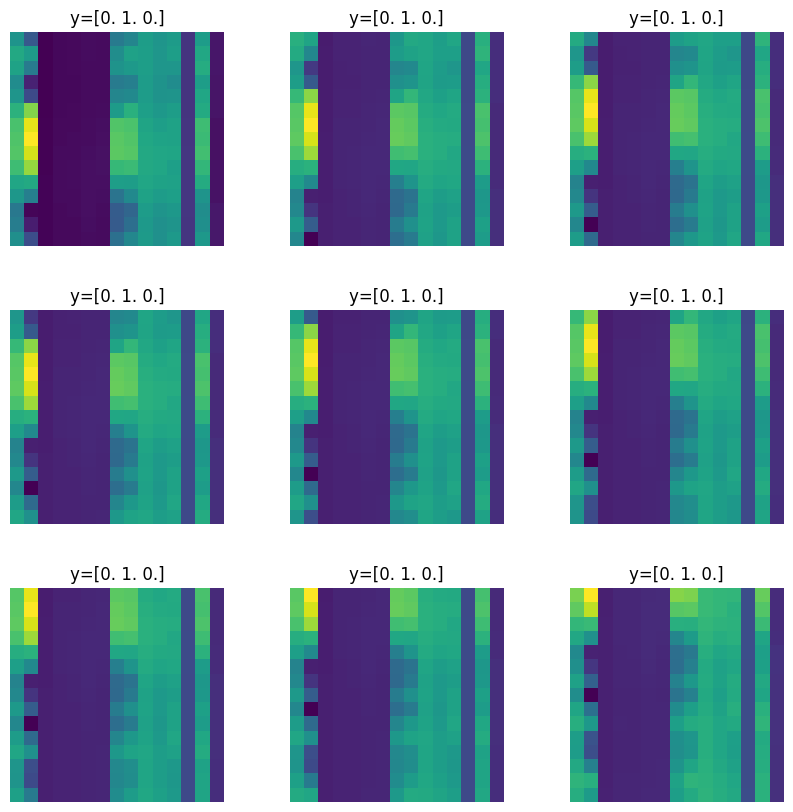

In [34]:
import matplotlib.pyplot as plt

# n为batch大小，这里设为9
n = 9

# 生成一个九宫格的画布
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# 遍历batch中的每一个样本，依次画出对应的矩阵和标注
for i in range(n):
    # 获取当前样本的矩阵和标注
    x = Xs[i]
    y = ys[i]
    
    # 在对应的子图上画出矩阵和标注
    axs[i//3, i%3].imshow(x)
    axs[i//3, i%3].set_title('y={}'.format(y))
    axs[i//3, i%3].axis('off')

# 调整子图之间的距离
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 显示画布
plt.show()


# Split training and test sets

In [35]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2359, 15, 15, 1) (2359, 3) (40, 15, 15, 1)


# 調整採樣

https://sharegpt.com/c/Vm1VcLs

In [36]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2359, 225)
(2359,)
0
0    573
1    573
2    573
Name: count, dtype: int64
(1719, 15, 15, 1)
(1719, 3)


# Split training and val sets

https://sharegpt.com/c/ZgCDypE

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1375, 15, 15, 1) (1375, 3) (344, 15, 15, 1) (344, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [38]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    1059
2     752
0     588
Name: count, dtype: int64

In [39]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    573
1    573
2    573
Name: count, dtype: int64

In [40]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

2    459
0    458
1    458
Name: count, dtype: int64

In [41]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

1    115
0    115
2    114
Name: count, dtype: int64

# 用chatgpt幫忙製作模型

https://sharegpt.com/c/M7VugUR

In [42]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout


# 創建一個序列模型
model = Sequential()

# 添加第一個卷積層，使用32個3x3的卷積核，使用ReLU激活函數，並指定輸入形狀
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)))

# 添加第二個卷積層，使用64個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(64, (3, 3), activation='relu'))

# 添加第三個卷積層，使用128個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(128, (3, 3), activation='relu'))

# 添加平坦層，將卷積層的輸出展開為一維數組
model.add(Flatten())

# 添加dropout層，防止過度擬合
model.add(Dropout(0.5))

# 添加全連接層，使用softmax激活函數，輸出3個類別
model.add(Dense(3, activation='softmax'))

# 編譯模型，使用交叉熵損失函數和Adam優化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 打印模型結構
model.summary()

c:\Users\TMP-214\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 13, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        31,107 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,779 (483.51 KB)

 Trainable params: 123,779 (483.51 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
'''
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()
'''

"\nnclasses = 3 \nmodel = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32\nmodel.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64\nmodel.add(MaxPool2D(pool_size=(5,5)))# 3,3,64\nmodel.add(Flatten())#576\nmodel.add(Dropout(0.5))#288\nmodel.add(Dense(128, activation='relu'))#128\nmodel.add(Dropout(0.5))#64\nmodel.add(Dense(32, activation='relu'))#32\nmodel.add(Dropout(0.5))#16\nmodel.add(Dense(nclasses, activation='softmax'))#3\nmodel.summary()\n"

# 編譯模型

In [43]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 定義訓練過程的早停法機制

In [44]:
es = EarlyStopping(monitor='val_accuracy',#驗證集acc
                   min_delta=0.0001, 
                   patience=20,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [45]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 200,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.3868 - loss: 1.0918 - val_accuracy: 0.3459 - val_loss: 1.0870
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4016 - loss: 1.0861 - val_accuracy: 0.3837 - val_loss: 1.0778
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4192 - loss: 1.0687 - val_accuracy: 0.3924 - val_loss: 1.0678
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4318 - loss: 1.0613 - val_accuracy: 0.4157 - val_loss: 1.0593
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4396 - loss: 1.0538 - val_accuracy: 0.4273 - val_loss: 1.0415
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4525 - loss: 1.0278 - val_accuracy: 0.4244 - val_loss: 1.0367
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4681 - loss: 1.0241 - val_accuracy: 0.4477 - val_loss: 1.0205
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4673 - loss: 1.0131 - val_accuracy: 0

# chatgpt協助做訓練過程評估

https://sharegpt.com/c/1CqBYQz

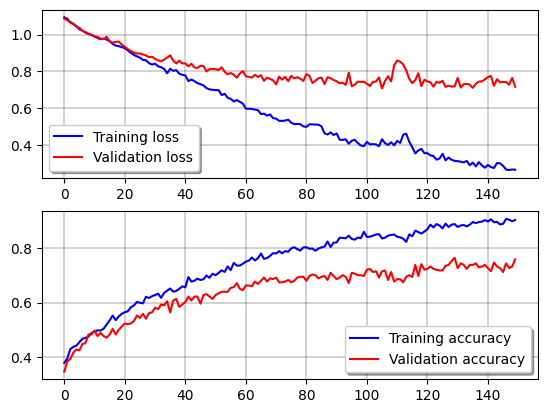

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# chatgpt協助做混淆矩陣

https://sharegpt.com/c/0SZ8tM0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


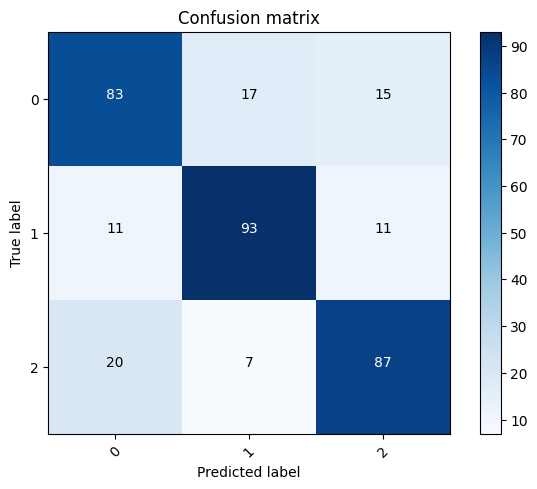

In [47]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
nclasses = 3
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# classification_report 

In [48]:
from sklearn.metrics import classification_report 
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

        Hold       0.73      0.72      0.72       115
         BUY       0.79      0.81      0.80       115
        SELL       0.77      0.76      0.77       114

   micro avg       0.76      0.76      0.76       344
   macro avg       0.76      0.76      0.76       344
weighted avg       0.76      0.76      0.76       344
 samples avg       0.76      0.76      0.76       344



# 驗證集的準確度

In [49]:
def val_acc(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
val_acc(yval,y_pred)

np.float64(0.7645348837209303)

## 測試集預測

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


[*********************100%***********************]  1 of 1 completed

40


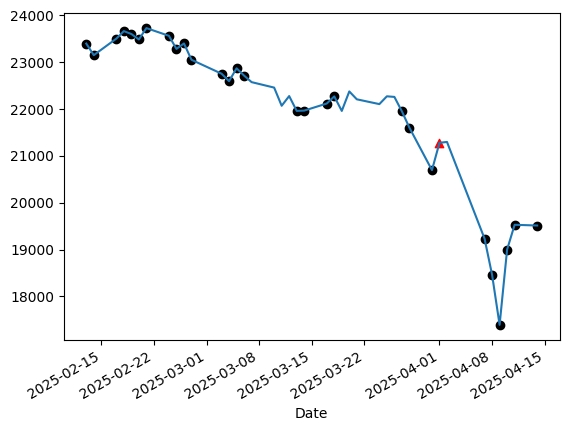

In [51]:
import pandas as pd
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))
C = pd.DataFrame()
C['Close'] = yf.download(y_symbol, start = startdate,end = enddate)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer 
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 製作交易訊號表格

In [52]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2025-03-14,21968.0508,0.0473,0.0005,0.9521
2025-03-17,22118.6309,0.0208,0.0011,0.9781
2025-03-18,22271.6699,0.1241,0.0091,0.8668
2025-03-19,21960.8301,0.5646,0.0198,0.4156
2025-03-20,22377.2598,0.8827,0.0198,0.0975
2025-03-21,22209.0996,0.9813,0.0088,0.0098
2025-03-24,22106.6406,0.9966,0.0026,0.0007
2025-03-25,22273.1895,0.9990,0.0005,0.0006
2025-03-26,22260.2891,0.9885,0.0016,0.0099


# 保存模型

In [53]:
model.save('model.h5')
del model
from keras.models import load_model
model = load_model('model.h5')
predict = model.predict(X_test)
predict[-5:]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[0.09318711, 0.01656417, 0.89024884],
       [0.02579292, 0.01545568, 0.95875144],
       [0.01724449, 0.04257869, 0.9401768 ],
       [0.01322635, 0.04305643, 0.94371724],
       [0.0277485 , 0.04836522, 0.92388624]], dtype=float32)